In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import ttest_ind

Step 1: Understand Your Data


In [ ]:
data = pd.read_csv("data.csv")
data.head(2)

,CustomerID,Name,State,Education,Gender,Age,Married,NumPets,JoinDate,TransactionDate,MonthlySpend,DaysSinceLastInteraction
0,CUST10319,Scott Perez,Florida,High School,Non-Binary,47,Yes,1,9/19/21,9/2/24,1281.74,332
1,CUST10695,Jennifer Burton,Washington,Master,Male,72,Yes,0,4/5/24,6/2/24,429.46,424


In [ ]:
# Checking the null values in the data (there are none)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10675 entries, 0 to 10674
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                10675 non-null  object 
 1   Name                      10675 non-null  object 
 2   State                     10675 non-null  object 
 3   Education                 10675 non-null  object 
 4   Gender                    10675 non-null  object 
 5   Age                       10675 non-null  int64  
 6   Married                   10675 non-null  object 
 7   NumPets                   10675 non-null  int64  
 8   JoinDate                  10675 non-null  object 
 9   TransactionDate           10675 non-null  object 
 10  MonthlySpend              10675 non-null  float64
 11  DaysSinceLastInteraction  10675 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 1000.9+ KB


In [ ]:
# Distinguishing the data into QUANTITATIVE data
quantitative = data.select_dtypes(include=["number"])
quantitative.head(2)

,Age,NumPets,MonthlySpend,DaysSinceLastInteraction
0,47,1,1281.74,332
1,72,0,429.46,424


In [ ]:
# QUALITATIVE data
qualitative = data.select_dtypes(include=['object','category','datetime'])
qualitative.head(2)

,CustomerID,Name,State,Education,Gender,Married,JoinDate,TransactionDate
0,CUST10319,Scott Perez,Florida,High School,Non-Binary,Yes,9/19/21,9/2/24
1,CUST10695,Jennifer Burton,Washington,Master,Male,Yes,4/5/24,6/2/24


Step 2: Descriptive Statistics

In [ ]:
# Describe your customer base — how old are they, how much do they spend, are they active?
print("Average age of our customer :",data['Age'].mean())
print("How much do our customer spend :",data['MonthlySpend'].median())
print("Number of days of last interaction :",data["DaysSinceLastInteraction"].std())

Average age of our customer : 49.47456674473068
How much do our customer spend : 282.11
Number of days of last interaction : 398.7667466311463


Step 3: Data Visualization

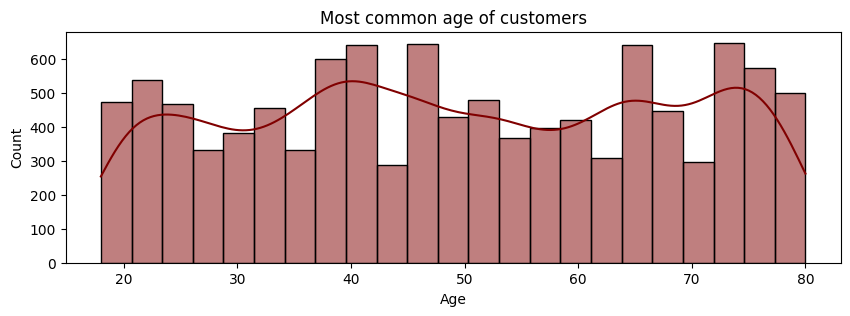

Most common age seems to be 40-80
Means our customers are mostly middle aged and old


In [21]:
plt.figure(figsize=(10,3))
sns.histplot(x='Age',data=data,color='maroon',kde=True)
plt.title("Most common age of customers")
plt.show()
print("Most common age seems to be 40-80")
print("Means our customers are mostly middle aged and old")

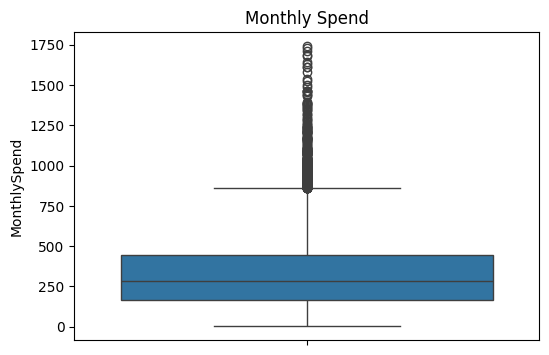

Monthly spends are always high.


In [22]:
plt.figure(figsize=(6,4))
sns.boxplot(y="MonthlySpend",data=data)
plt.title("Monthly Spend")
plt.show()
print("Monthly spends are always high.")

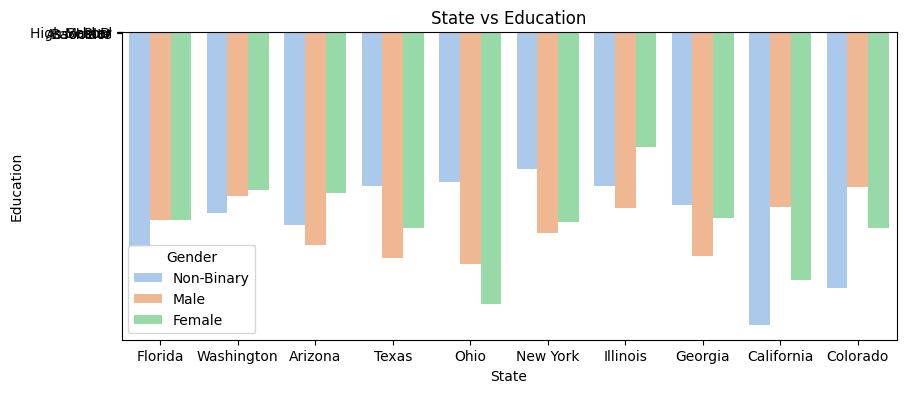

The reason for the overlapping of the values in y axix is that it is categorical data.
There was no numerical data in the question.


In [ ]:
plt.figure(figsize=(10,4))
sns.barplot(x=data['State'],y=data['Education'],hue=data['Gender'],errorbar=None,estimator='sum',palette='pastel')
plt.title("State vs Education")
plt.show()
print("The reason for the overlapping of the values in y axix is that it is categorical data.")
print("There was no numerical data in the question.")

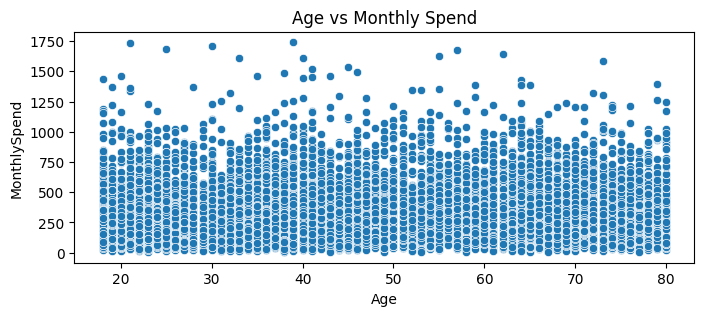

People of the age between 30-50 spends the most


In [ ]:
plt.figure(figsize=(8,3))
sns.scatterplot(x="Age",y="MonthlySpend",data=data)
plt.title('Age vs Monthly Spend')
plt.show()
print("People of the age between 30-50 spends the most")

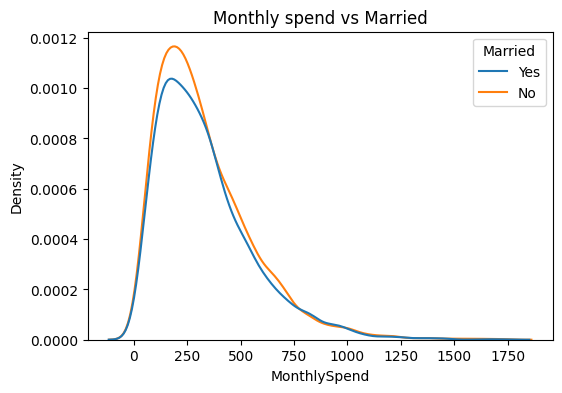

Non-Married peoples seems to spend more than the married ones


In [ ]:
plt.figure(figsize=(6,4))
sns.kdeplot(data=data,x='MonthlySpend',hue='Married')
plt.title("Monthly spend vs Married")
plt.show()
print("Non-Married peoples seems to spend more than the married ones")

Step 4: Bivariate Analysis

In [ ]:
quantitative_data = data.corr(numeric_only=True)
quantitative_data

,Age,NumPets,MonthlySpend,DaysSinceLastInteraction
Age,1.000000,-0.023035,-0.012323,-0.003970
NumPets,-0.023035,1.000000,0.020647,-0.055227
MonthlySpend,-0.012323,0.020647,1.000000,0.006081
DaysSinceLastInteraction,-0.003970,-0.055227,0.006081,1.000000


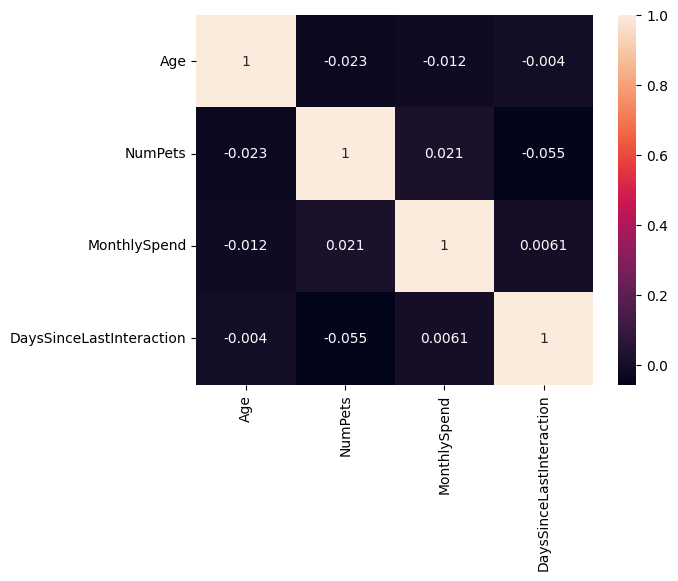

In [ ]:
# Correlation matrix
sns.heatmap(quantitative_data,annot=True)
plt.show()

In [ ]:
# Grouped stats: average MonthlySpend by State, Education, Gender
print("Average amount spend by State :")
data.groupby("State")["MonthlySpend"].aggregate(np.average)

Average amount spend by State :


,MonthlySpend
State,
Arizona,341.489135
California,339.183492
Colorado,323.083462
Florida,327.696892
Georgia,328.354648
Illinois,332.589591
New York,332.151244
Ohio,340.187860
Texas,319.506770


In [ ]:
print("Average amount spend by Education :")
data.groupby("Education")["MonthlySpend"].aggregate(np.average)

Average amount spend by Education :


,MonthlySpend
Education,
Associate,327.884408
Bachelor,331.884753
High School,332.215712
Master,334.252305
PhD,331.690090


In [ ]:
print("Average amount spend by Gender :")
data.groupby("Gender")["MonthlySpend"].aggregate(np.average)

Average amount spend by Gender :


,MonthlySpend
Gender,
Female,331.361310
Male,333.174068
Non-Binary,330.147240


Step 5: Formulate Hypotheses

In [ ]:
# STEP 5 WAS INFORMATION NOT QUESTION :)

Step 6: Run Hypothesis Tests

Do males and females spend differently?

In [ ]:
print("Null Hypothesis")
print("There is no difference in average Monthly Spend between males and females.")
print("Alternative Hypothesis")
print("There is a difference in average Monthly Spend between males and females.")
data_gender=data[data['Gender'].isin(['Male', 'Female'])]
male=data_gender[data_gender['Gender'] == 'Male']['MonthlySpend']
female=data_gender[data_gender['Gender'] == 'Female']['MonthlySpend']
t_stat, p_value = ttest_ind(male,female,equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_value)
print("Hence we FAIL TO REJECT the null hypothesis")

Null Hypothesis
There is no difference in average Monthly Spend between males and females.
Alternative Hypothesis
There is a difference in average Monthly Spend between males and females.
T-statistic: 0.3391303706925083
P-value: 0.7345215220030699
Hence we FAIL TO REJECT the null hypothesis


Are old people less active?

In [ ]:
print("Null Hypothesis")
print("There is no correlation between age and days since last interaction.")
print("Alternative Hypothesis")
print("There is a correlation between age and days since last interaction.")

corr, p_value = pearsonr(data['Age'],data['DaysSinceLastInteraction'])
print("Correlation:", corr)
print("P-value:", p_value)
print("The relation is MODERATE POSITIVE")
print("It means older people interact less often")
print("Hence we FAIL TO REJECT the null hypothesis")

Null Hypothesis
There is no correlation between age and days since last interaction.
Alternative Hypothesis
There is a correlation between age and days since last interaction.
Correlation: -0.003970230104955049
P-value: 0.681690543730101
The relation is MODERATE POSITIVE
It means older people interact less often
Hence we FAIL TO REJECT the null hypothesis


Step 7: Present Business Insights

Insights we can consider from the above analysis :
1. The average age of our customers is 49. This shows that people around that age should be our priority.
2. The average person spends around 280. In the future our prices of products should be around 280-300 for the affordability of our customers.
3. Analysing the scatter plot we can conclude that customers of age 30-50 spends the most.
4. Non-married peoples seems to spend more than the married ones.
5. The most profits for the company comes from the state ARIZONA.
6. Males have the most average spending out of other genders eg-females and non binary.

In [ ]:
print("The End")

The End
